In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

from src.random_forest import Random_forest

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None 

### RANDOM FOREST ON RANDOM_OVER_SAMPLE DATAFRAME

-----


In [2]:
df_over = pd.read_pickle('data/generated_data/cardio_processed_over.pkl')
df_over.head()

,age_category,BMI_category,BPMeds,prevalentStroke,prevalentHyp,diabetes,age,cigsPerDay,totChol,sysBP,BMI,heartRate,glucose,education_1.0,education_2.0,education_3.0,education_4.0,sex_F,sex_M,is_smoking_NO,is_smoking_YES,TenYearCHD
0,2.0,0.25,0,0,0,0,1.071429,0.15,-0.224138,0.722222,0.450931,1.000000,0.142857,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
1,0.5,0.25,0,0,1,0,-0.928571,0.00,-0.379310,1.462963,0.883744,-0.200000,-0.214286,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0
2,0.5,0.00,0,0,0,0,-0.214286,0.50,0.275862,-0.462963,-1.012582,0.866667,1.142857,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
3,0.5,0.25,0,0,1,0,0.071429,1.00,-0.017241,1.092593,0.579768,-0.466667,1.142857,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
4,2.0,0.25,0,0,0,0,1.071429,1.50,0.120690,0.296296,0.209361,-0.333333,-0.071429,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0


In [3]:
response_var = 'TenYearCHD'

In [4]:
param_over = {"max_depth": [9, 10, 11, 12], 
        "max_features": [2, 3, 4, 5],
        "min_samples_split": [50, 100, 150],
        "min_samples_leaf": [10, 20, 50]} 

In [5]:
random_forest_over = Random_forest(df_over, response_var, param_over)

In [6]:
random_forest_pred = random_forest_over.fit_model()

In [7]:
with open ('data/predict_objects/random_forest_pred.pkl','wb') as rf:
    pickle.dump(random_forest_pred, rf)

In [8]:
rf_over_results = random_forest_over.get_metrics('OVER Random Forest')
rf_over_results

,accuracy,precision,recall,f1,kappa,set,model
0,0.797454,0.769737,0.833729,0.800456,0.595480,test,OVER Random Forest
1,0.845658,0.823207,0.884634,0.852816,0.691024,train,OVER Random Forest


In [9]:
random_forest_over.create_df_feature_importance()

,predictor,importance
6,age,0.196031
9,sysBP,0.161042
12,glucose,0.107887
8,totChol,0.102142
10,BMI,0.099106
11,heartRate,0.077773
7,cigsPerDay,0.056396
0,age_category,0.044035
4,prevalentHyp,0.037516
17,sex_F,0.017007


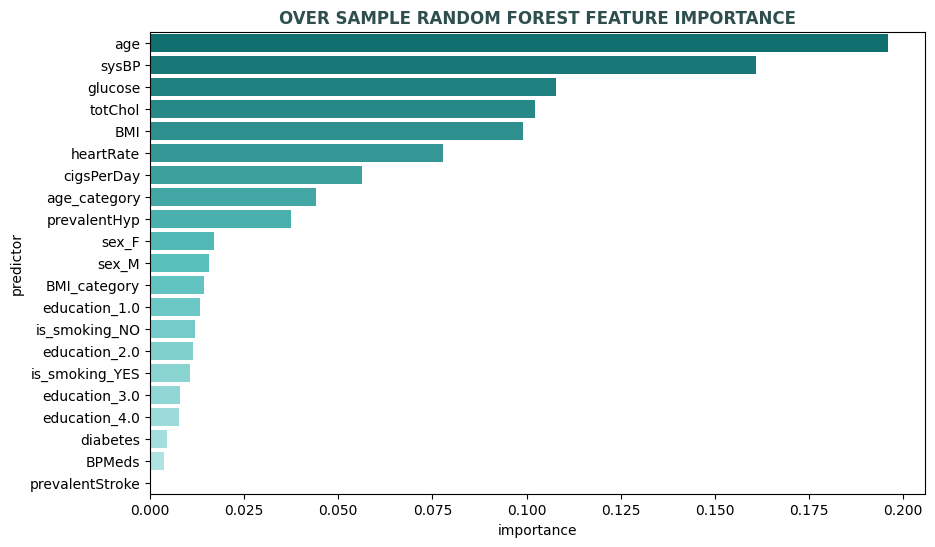

In [10]:
random_forest_over.create_barplot_feature_importance('OVER SAMPLE')

### RANDOM FOREST ON TOKEN_SMOTE DATAFRAME

-----


In [11]:
df_ts = pd.read_pickle('data/generated_data/cardio_processed_ts.pkl')
df_ts.head()

,age_category,BMI_category,BPMeds,prevalentStroke,prevalentHyp,diabetes,age,cigsPerDay,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0,sex_F,sex_M,is_smoking_NO,is_smoking_YES
0,2.0,0.25,0,0,0,0,1.071429,0.15,-0.224138,0.722222,0.450931,1.000000,0.142857,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.5,0.25,0,0,1,0,-0.928571,0.00,-0.379310,1.462963,0.883744,-0.200000,-0.214286,0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.5,0.00,0,0,0,0,-0.214286,0.50,0.275862,-0.462963,-1.012582,0.866667,1.142857,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.5,0.25,0,0,1,0,0.071429,1.00,-0.017241,1.092593,0.579768,-0.466667,1.142857,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,2.0,0.25,0,0,0,0,1.071429,1.50,0.120690,0.296296,0.209361,-0.333333,-0.071429,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [12]:
param_ts = {"max_depth": [10, 11, 12], 
        "max_features": [3, 4, 5],
        "min_samples_split": [50, 100, 150],
        "min_samples_leaf": [10, 20, 50]} 

In [13]:
random_forest_ts = Random_forest(df_ts, response_var, param_over)

In [14]:
random_forest_ts.fit_model()

RandomForestClassifier(max_depth=9, max_features=2, min_samples_leaf=10,
                       min_samples_split=50, random_state=42)

In [15]:
rf_ts_results = random_forest_ts.get_metrics('TS Random Forest')
rf_ts_results

,accuracy,precision,recall,f1,kappa,set,model
0,0.853491,0.0,0.0,0.0,0.0,test,TS Random Forest
1,0.847450,0.0,0.0,0.0,0.0,train,TS Random Forest


In [16]:
random_forest_ts.create_df_feature_importance()

,predictor,importance
6,age,0.181663
9,sysBP,0.148618
12,glucose,0.095049
0,age_category,0.082176
10,BMI,0.079724
8,totChol,0.077259
4,prevalentHyp,0.056562
11,heartRate,0.056200
7,cigsPerDay,0.048438
18,sex_M,0.031238


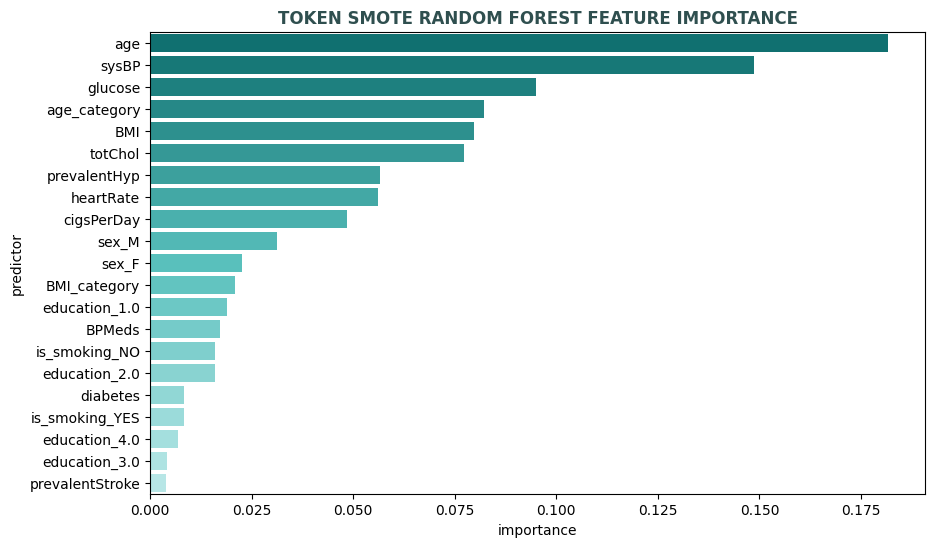

In [17]:
random_forest_ts.create_barplot_feature_importance('TOKEN SMOTE')

### SAVE RESULTS

-----


In [18]:
lr_dt_results = pd.read_pickle('data/generated_data/LR_DT_results.pkl')

In [19]:
all_results = pd.concat([lr_dt_results, rf_over_results, rf_ts_results], axis = 0)
all_results

,accuracy,precision,recall,f1,kappa,set,model
0,0.695602,0.681193,0.705463,0.693116,0.391347,test,OVER Logistic Regression
1,0.654094,0.656448,0.662248,0.659335,0.308039,train,OVER Logistic Regression
0,0.860374,0.684211,0.087248,0.154762,0.125791,test,TS Logistic Regression
1,0.856300,0.744186,0.088398,0.158025,0.129837,train,TS Logistic Regression
0,0.710648,0.681915,0.761283,0.719416,0.422590,test,OVER Decision Tree Best
1,0.756079,0.738246,0.801669,0.768651,0.511638,train,OVER Decision Tree Best
0,0.852507,0.473684,0.060403,0.107143,0.076540,test,TS Decision Tree Best
1,0.853772,0.631579,0.099448,0.171838,0.135976,train,TS Decision Tree Best
0,0.797454,0.769737,0.833729,0.800456,0.595480,test,OVER Random Forest
1,0.845658,0.823207,0.884634,0.852816,0.691024,train,OVER Random Forest


Using the Random Forest technique on the Over_Sample Dataframe, we attained the most satisfactory metrics thus far. The metrics are satisfactory, although the kappa score could be improved. Nonetheless, we could not achieve an acceptable outcome in the Token_Smote Dataframe despite our best efforts to adjust the model, hence we disregard this result. Although we are satisfied with the results of the first dataframe, we will try a different model.

In [20]:
all_results.to_pickle('data/generated_data/LR_DT_RF_results.pkl')